import data 

In [10]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/Personal_save/Python")

transactions = pd.read_csv("transactions.csv", na_values=["", "NA"])

display(transactions.head())

,t,success,mid,pmt,pg,sub_type,hr,bank
0,2,1,zivame,NB,PAYU,NaN,2020-02-14 06,NB_CITI
1,1,0,urbanclap,NB,PAYTM,NaN,2020-02-14 06,NB_SYNB
2,5,1,pharmeasytech,WALLET,AIRTELMONEY,REDIRECT_WALLET_DEBIT,2020-02-14 11,AIRTELMONEY
3,1,1,pharmeasytech,CARD,PAYU,NaN,2020-02-14 12,THE SATARA SAHAKARI BANK LTD MUMBAI
4,1,1,fanfight,CARD,RAZORPAY,NaN,2020-02-14 06,DCB


clean data 

In [11]:
#replace NA's with string
transactions.fillna("notprovided", inplace = True)

#change column names
transactions.columns = ["t", "s", "mid", "pmt", "pg", "subtype", "hr", "bank"]

compute the transaction failure rate for each unique hour within the data set and plot it 

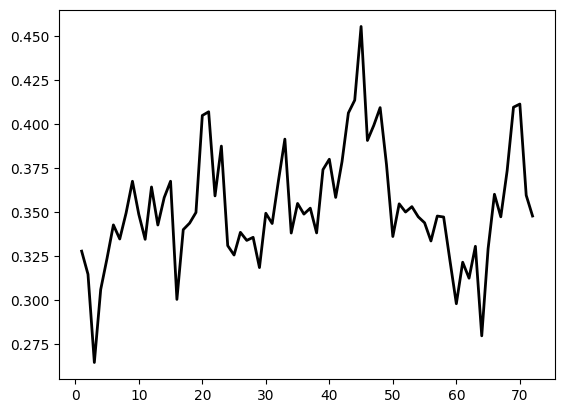

In [12]:
unique_hours = sorted(transactions['hr'].unique())

t_by_hour = transactions.groupby('hr')['t'].sum()
s_by_hour = transactions.groupby('hr')['s'].sum()

failure_count = t_by_hour - s_by_hour
failure_rate = failure_count / t_by_hour

plot_failure_rate = pd.DataFrame({
    'hours': unique_hours,
    'failure_rate': failure_rate,
    'x_index': np.arange(1,73)
})

plt.plot(
    plot_failure_rate['x_index'],
    plot_failure_rate['failure_rate'],
    color = 'black', linewidth=2
)